In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Root finding Methods

## Bisection:

In [3]:
def f(x):
    return x**3 +4*x**2 -10
def error_bound(a,b,err):
    n=np.log((b-a)/err) / np.log(2)
    print(n)
    return int(np.ceil(n))


def bisection(f, a, b, tol):
    i=1
    #FA = f
    n = error_bound(a, b, tol)
    while i <= n:
        p = a + ((b-a)/2)
        if f(p) == 0 or (b-a)/2 < tol:
            print(i, p)
            return p
        if f(a)*f(p) > 0:
            a = p
        else:
            b=p
        i+=1
    return

bisection(f,-1,3,0.0001)


15.287712379549449
16 1.36517333984375


1.36517333984375

In [4]:
def f(x):
    return x**3 -x**2 -5

def validate_interval(f,x0,x1):
    return f(x0)*f(x1) < 0

def error_bound(a,b,err):
    n=np.log((b-a)/err) / np.log(2)
    return int(np.ceil(n))

def bisection(f, interval, tol):
    x0, x1 = interval[0], interval[1] #extract interval 
    if not validate_interval(f, x0, x1): #check interval can be solved for roots
        return

    n = error_bound(x0, x1, tol)
    counter = 1
    while True:
        root_approx = x0 + ((x1-x0)/2)
        y = f(root_approx)
        if -tol < y < tol:
            print(counter, n)
            print(root_approx)
            return root_approx
        if validate_interval(f,x0,root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter += 1



bisection(f,[-1,3], 0.0001) 

15 16
2.1163330078125


2.1163330078125

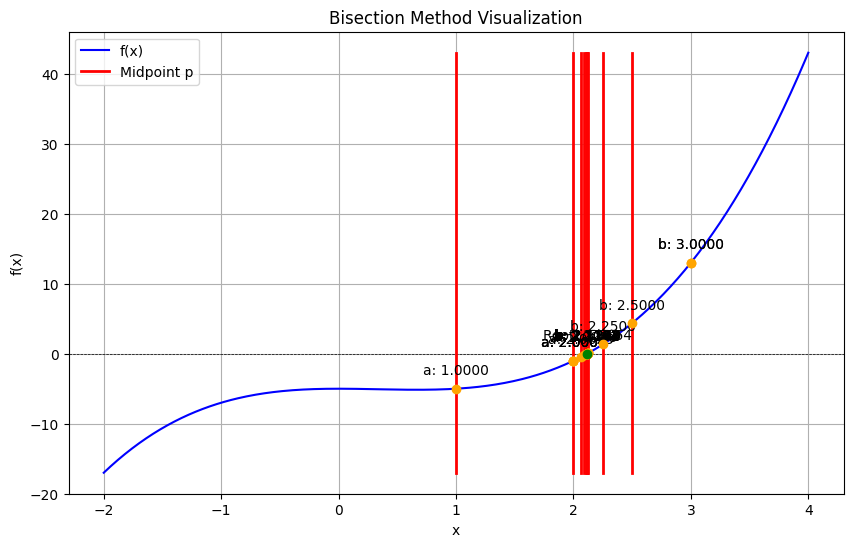

2.11639404296875

In [5]:
def bisection_with_visualization(f, a, b, tol):
    i = 1
    n = error_bound(a, b, tol)
    
    # Prepare for visualization
    x = np.linspace(a - 1, b + 1, 400)
    y = f(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)', color='blue')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    
    while i <= n:
        p = a + ((b - a) / 2)
        plt.plot([p, p], [min(y), max(y)], color='red', lw=2, label='Midpoint p' if i == 1 else "")
        
        if f(p) == 0 or (b - a) / 2 < tol:
            plt.scatter(p, f(p), color='green', zorder=5)
            plt.annotate(f'Root: {p:.4f}', (p, f(p)), textcoords="offset points", xytext=(0,10), ha='center')
            plt.title('Bisection Method Visualization')
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.legend()
            plt.grid()
            plt.show()
            return p
        
        if f(a) * f(p) > 0:
            a = p
        else:
            b = p
        
        plt.scatter([a, b], [f(a), f(b)], color='orange', zorder=5)
        plt.annotate(f'a: {a:.4f}', (a, f(a)), textcoords="offset points", xytext=(0,10), ha='center')
        plt.annotate(f'b: {b:.4f}', (b, f(b)), textcoords="offset points", xytext=(0,10), ha='center')
        
        i += 1
    
    plt.title('Bisection Method Visualization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()
    plt.show()
    return

bisection_with_visualization(f, -1, 3, 0.0001)


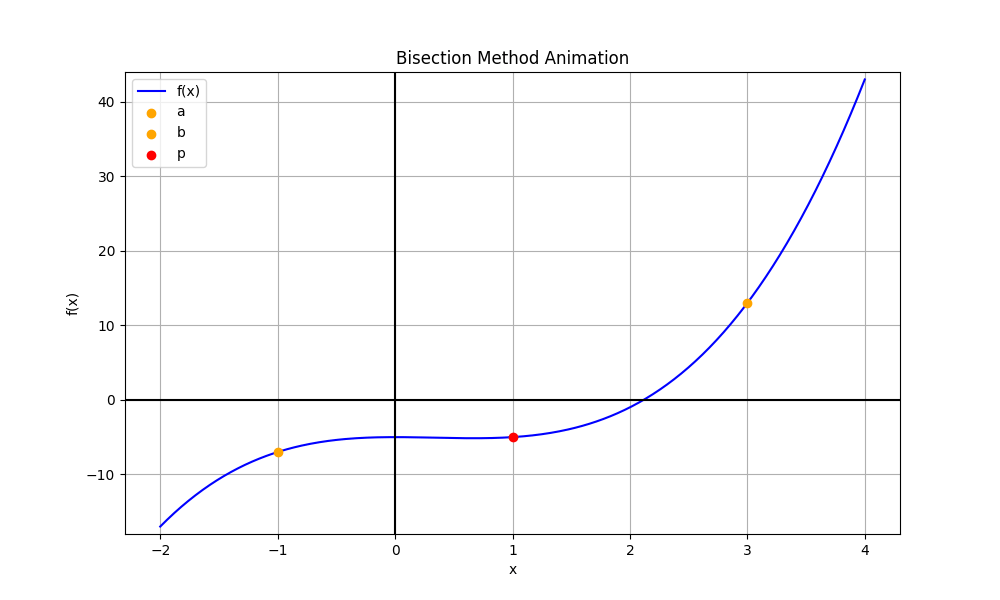

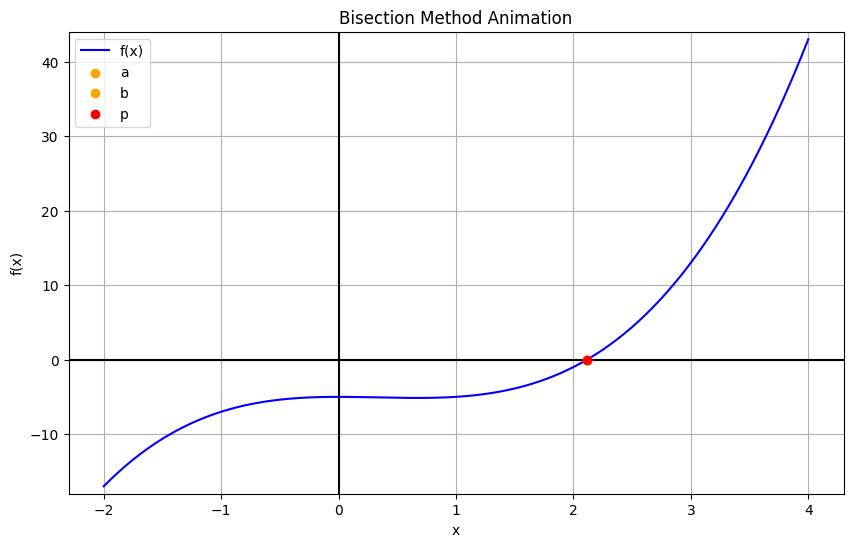

In [6]:
def bisection_animation(f, a, b, tol):
    i = 1
    n = error_bound(a, b, tol)
    
    # Prepare for visualization
    x = np.linspace(a - 1, b + 1, 400)
    y = f(x)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, label='f(x)', color='blue')
    ax.axhline(0, color='black', lw=1.5, ls='-')
    ax.axvline(0, color='black', lw=1.5, ls='-')
    points_a = []
    points_b = []
    points_p = []
    
    while i <= n:
        p = a + ((b - a) / 2)
        
        points_a.append((a, f(a)))
        points_b.append((b, f(b)))
        points_p.append((p, f(p)))
        
        if f(p) == 0 or (b - a) / 2 < tol:
            break
        
        if f(a) * f(p) > 0:
            a = p
        else:
            b = p
        
        i += 1

    # Animation function
    def update(frame):
        ax.clear()
        ax.plot(x, y, label='f(x)', color='blue')
        ax.axhline(0, color='black', lw=1.5, ls='-')
        ax.axvline(0, color='black', lw=1.5, ls='-')

        # Plot points
        if frame < len(points_a):
            ax.scatter(*points_a[frame], color='orange', zorder=5, label='a')
            ax.scatter(*points_b[frame], color='orange', zorder=5, label='b')
            ax.scatter(*points_p[frame], color='red', zorder=5, label='p')
        
        ax.set_title('Bisection Method Animation')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.legend()
        ax.grid()
        ax.set_ylim(min(y) - 1, max(y) + 1)

    ani = FuncAnimation(fig, update, frames=len(points_a), repeat=False)
    
    # Save the animation
    ani.save('bisection_method_animation.gif', writer='ffmpeg', fps=2)
    plt.show()

bisection_animation(f, -1, 3, 0.0001)

### 2.3 Newton's Method
- used for root finding
- based on taylor polynomials

Suppose that $f \in C^2[a,b]$ Let $p_0 \in [a,b]$ be an approx to $p$ s.t $f'(p_0) \neq 0$ and $|p-p_0|$  is small. Consider the first Taylor polynomial for $f(x)$ expanded about $p_0$ and evaluated at $x=p$:

$$
f(p) = f(p_0) + (p-p_0)f'(p_0)+\frac{(p-p_0)^2}{2}f''(\xi (p))
$$
where $\xi (p)$ lies between $p$ and $p_0$ . Since $f(p) = 0$ , this eqn gives:

$$
0 = f(p_0) + (p-p_0)f'(p_0) + \frac{(p-p_0)^2}{2} f''(\xi (p)).
$$

Assuming $|p-p_0|$ is small, $|p-p_0|^2$ is much smaller, so

$$
0 \approx f(p_0) + (p-p_0)f'(p_0)
$$

and solving for $p$ gives:

$$
p \approx p_0 - \frac{f(p_0)}{f'(p_0)} \equiv p_1
$$

This sets the background for Newton's method, which starts with an initial approx $p_0$ and generates the sequence $\{p_n\}^\infty_{n=0}$, by:

$$
p_n = p_{n-1} - \frac{f(p_{n-1})}{f'(p_{n-1})}, \quad \text{for} \ n \geq 1
$$



In [7]:
def f(x):
    return np.cos(x)-x

def df(x):
    return -1*np.sin(x) -1

def Newton(f, p_0, tol, N):
    i = 1
    while i <= N:
        p = p_0 - f(p_0)/df(p_0)
        if np.absolute(p-p_0) < tol:
            return p
        i += 1
        p_0 = p
    print("couldn't find after", i , "iterations")

Newton(f,np.pi/4, 0.001, 5)

np.float64(0.7390851781060102)

Root found: 0.7390851781060102


/tmp/ipykernel_8936/1827656276.py:44: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of len(frames)=3.
  ani = FuncAnimation(fig, update, frames=steps, init_func=init, blit=True, repeat=True, save_count=50)


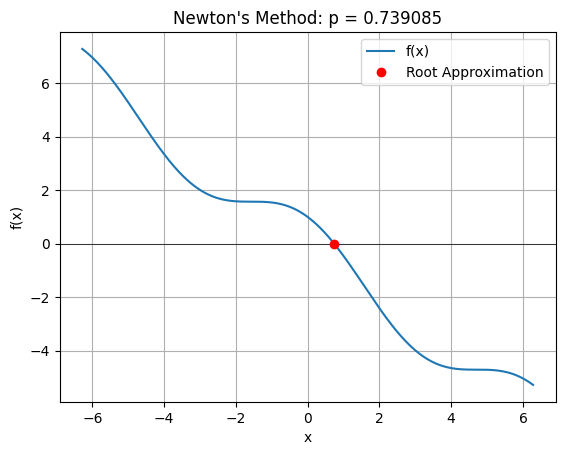

In [8]:
def f(x):
    return np.cos(x) - x

def df(x):
    return -np.sin(x) - 1

def Newton(f, df, p_0, tol, N):
    steps = []
    i = 1
    while i <= N:
        p = p_0 - f(p_0) / df(p_0)
        steps.append(p_0)
        if np.absolute(p - p_0) < tol:
            steps.append(p)
            return steps, p
        i += 1
        p_0 = p
    print("Couldn't find after", i, "iterations")
    return steps, None

# Generate the steps for the animation
initial_guess = np.pi / 4
steps, root = Newton(f, df, initial_guess, 0.001, 5)
print(f"Root found: {root}")

# Set up the figure and axis
fig, ax = plt.subplots()
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = f(x)
ax.plot(x, y, label='f(x)')
ax.axhline(0, color='black', linewidth=0.5)
line, = ax.plot([], [], 'ro', label='Root Approximation')

def init():
    line.set_data([], [])
    return line,

def update(p_0):
    line.set_data([p_0], [f(p_0)])
    ax.set_title(f'Newton\'s Method: p = {p_0:.6f}')
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=steps, init_func=init, blit=True, repeat=True, save_count=50)

ani.save('newton_method_animation.gif', writer='ffmpeg', fps=1)


plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()